# Phase 3: Sentiment Analysis & Visualization
## Analysis of DANA App Reviews

> **Author:** Azizah Adilah

> **Date:** January 2026

### **Project Overview**
In this final phase, I will analyze the processed data to understand user sentiment. I will categorize the reviews based on their star ratings and visualize the results using charts and Word Clouds to identify key pain points and positive feedback for the DANA application.

### **Import Libraries and Load Data**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the cleaned dataset from Phase 2
df = pd.read_csv('../data/reviews_dana_cleaned.csv')

# Quick check of the data
df.head()

,content,score,content_clean
0,lumayan TPI kadang erorr sampah,5,lumayan tpi kadang erorr sampah
1,sangat buruk pelayananya baru beberapa hari ap...,1,sangat buruk pelayananya baru beberapa hari gk...
2,luar biasa berguna,5,luar biasa
3,bagus,5,bagus
4,sangat baik,5,sangat baik


### **Labeling Sentiment**

In [12]:
# Function to categorize ratings into sentiment labels
def create_label(score):
    if score >= 4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function
df['sentiment'] = df['score'].apply(create_label)

# Show the total count for each sentiment
print("Sentiment Distribution:")
print(df['sentiment'].value_counts())

Sentiment Distribution:
sentiment
Positive    707
Negative    246
Neutral      47
Name: count, dtype: int64


### **Sentiment Distribution Visualization**

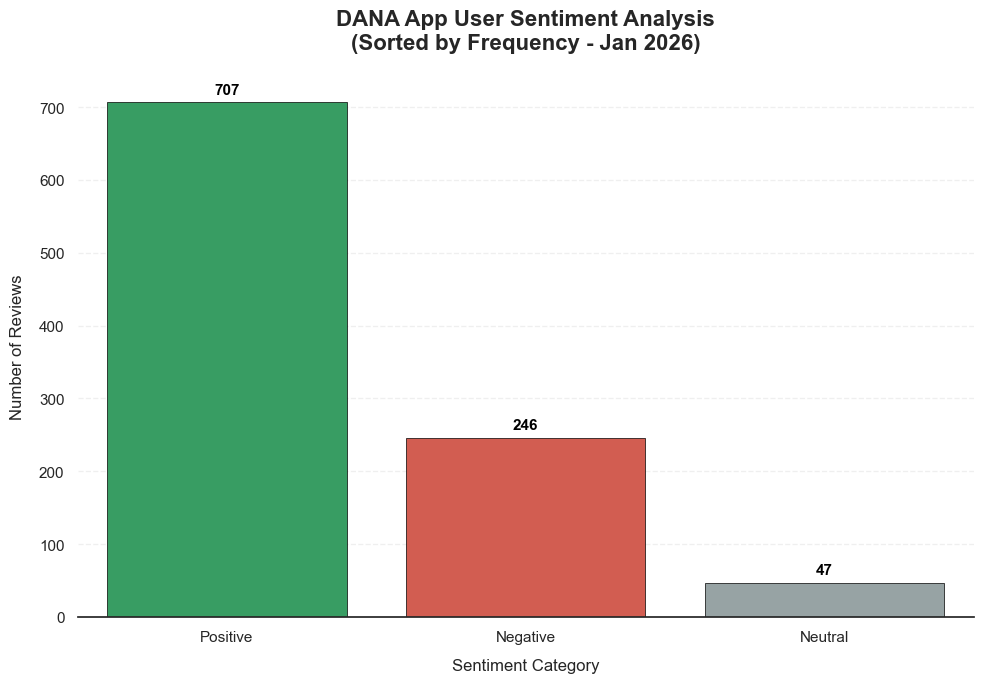

In [ ]:
# Set parameters
sns.set_theme(style="white", palette="pastel") 
plt.figure(figsize=(10, 7))

# Define custom colors 
color_dict = {"Positive": "#27ae60", "Negative": "#e74c3c", "Neutral": "#95a5a6"}

# Create the bar plot with 'order' based on the highest values 
ax = sns.countplot(
    x='sentiment', 
    data=df, 
    order=df['sentiment'].value_counts().index, 
    palette=color_dict,
    hue='sentiment', 
    legend=False,
    edgecolor="black", 
    linewidth=0.5
)

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=11, fontweight='bold', color='black')

# Clean up the spines
sns.despine(left=True, bottom=False)

# Customize Titles and Labels
plt.title('DANA App User Sentiment Analysis\n(Sorted by Frequency - Jan 2026)', fontsize=16, fontweight='bold', pad=20, loc='center')
plt.xlabel('Sentiment Category', fontsize=12, labelpad=10)
plt.ylabel('Number of Reviews', fontsize=12, labelpad=10)

# Add a subtle grid on the Y-axis only
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.savefig('../visualizations/sentiment_distribution_sorted.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

#### **Key Findings from Distribution:**
* **Positive Sentiment:** Usually represents users satisfied with the convenience of digital payments.
* **Negative Sentiment:** Often triggered by technical issues like failed transactions or "DANA Cicil" problems.
* **Neutral Sentiment:** Users who find the app useful but have minor suggestions for improvement.

#### **Visualization Insights:**
* **Overall Market Perception:** The majority of users (Positive) are still satisfied with DANA's core services, likely due to its ease of use in daily transactions.
* **The "Urgent" Gap:** There is a significant amount of negative feedback (**~30% of the sample**) which indicates that technical bugs (Login/Update) and "DANA Cicil" issues are not just isolated cases but systemic problems that need immediate attention from the dev team.

### **Wordcloud Comparison (Positive vs Negative)**

This visualization compares the most frequent words in **Positive** vs. **Negative** reviews to identify key satisfaction drivers and critical pain points.

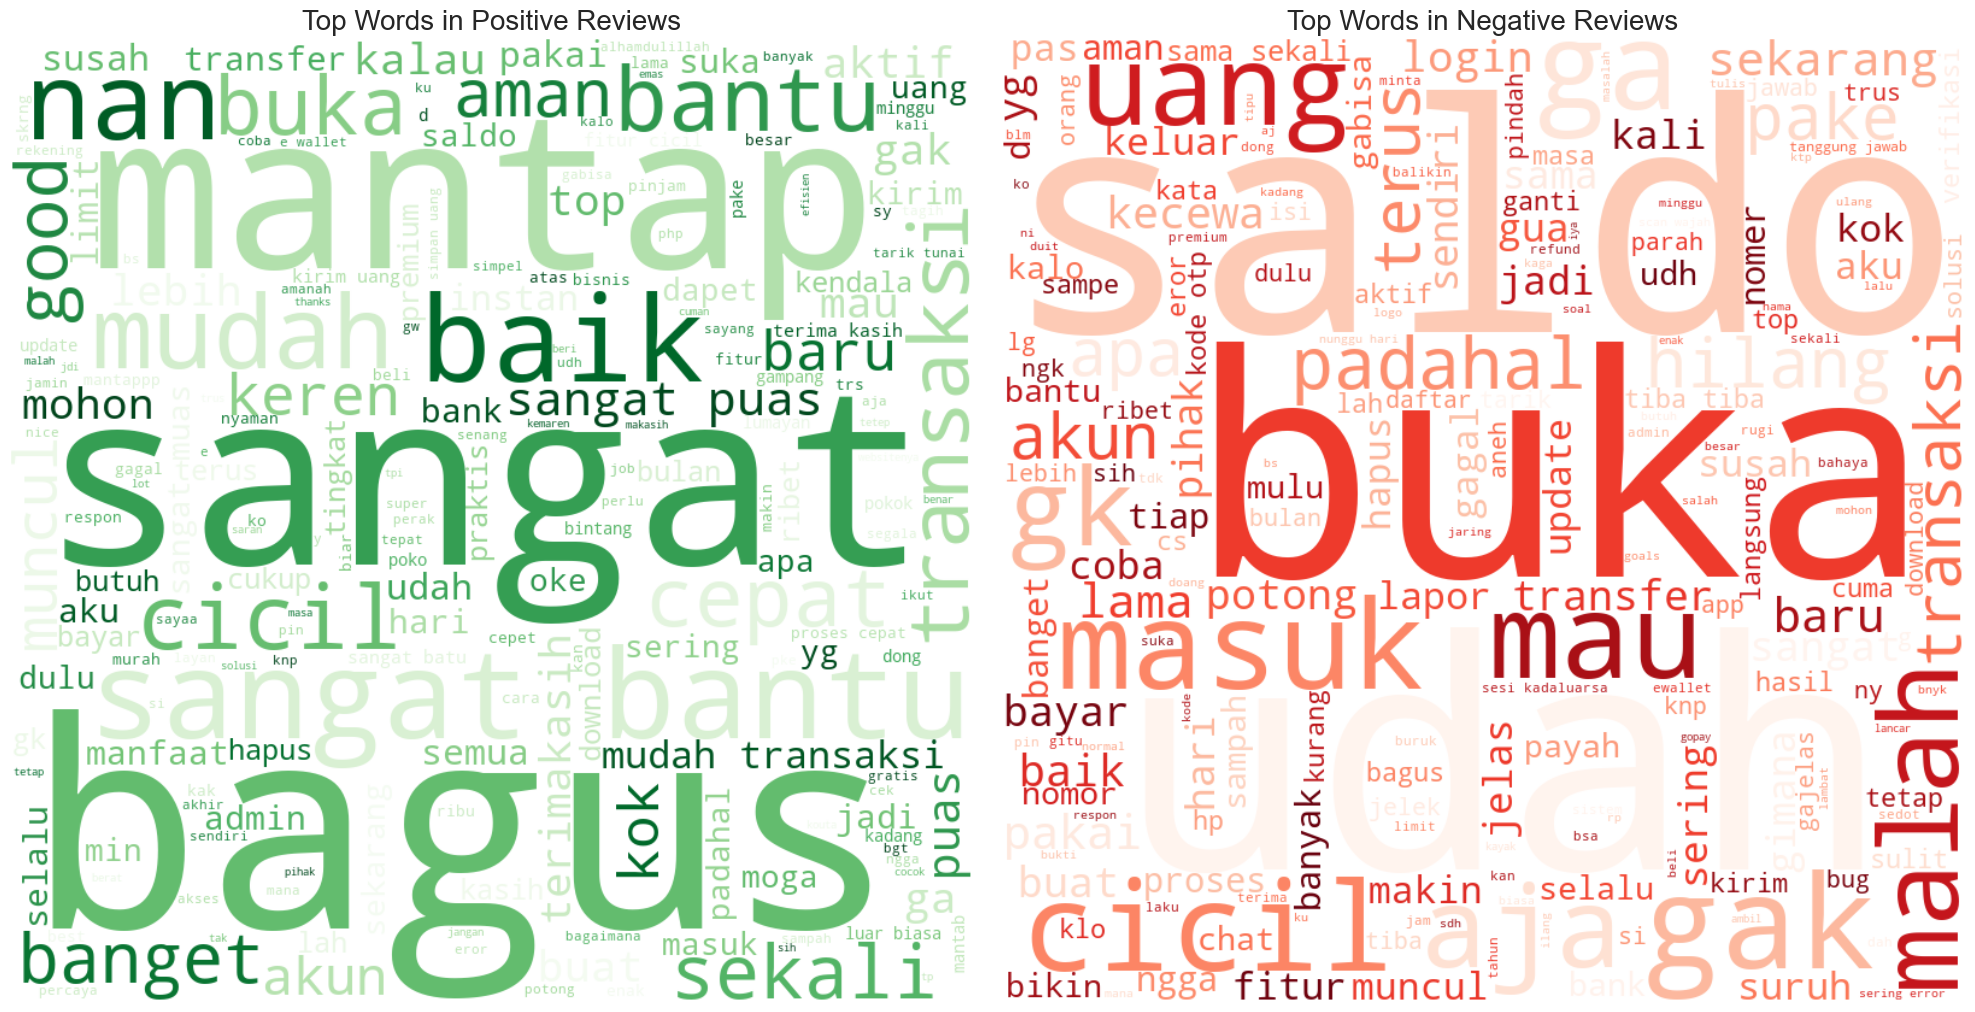

In [20]:
from wordcloud import WordCloud

# Separate the cleaned text by sentiment
positive_text = ' '.join(df[df['sentiment'] == 'Positive']['content_clean'].astype(str))
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['content_clean'].astype(str))

# Create a figure for comparison
plt.figure(figsize=(20, 10))

# Positive Word Cloud
plt.subplot(1, 2, 1)
wc_pos = WordCloud(width=800, height=800, background_color='white', colormap='Greens').generate(positive_text)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title('Top Words in Positive Reviews', fontsize=20)
plt.axis('off')

# Negative Word Cloud
plt.subplot(1, 2, 2)
wc_neg = WordCloud(width=800, height=800, background_color='white', colormap='Reds').generate(negative_text)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title('Top Words in Negative Reviews', fontsize=20)
plt.axis('off')

plt.savefig('../visualizations/wordcloud_comparison.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

### **Visualization Insights**

#### **1. Positive Sentiment: Success Drivers**
* **Core Value Proposition**: Dominant words like **"mantap"**, **"bagus"**, and **"bantu"** indicate that users find DANA highly effective for their daily needs.
* **Service Speed**: The appearance of **"cepat"** and **"mudah"** suggests that transaction efficiency is a major reason for high ratings.
* **Feature Engagement**: Words like **"cicil"** and **"bayar"** show that when functional, these features provide significant value to the user base.

#### **2. Negative Sentiment: Critical Pain Points**
* **Technical Barriers**: The prominence of **"buka"**, **"masuk"**, and **"login"** points to systemic application stability issues where users struggle even to access the app.
* **Trust & Security Risks**: Keywords like **"saldo"**, **"hilang"**, and **"kecewa"** are high-alert signals. For a fintech app, issues regarding money synchronization are the fastest way to lose user trust.
* **Communication Patterns**: The high frequency of **"udah"**, **"gak"**, and **"tapi"** often represents frustrated logic, such as *"Already paid, BUT balance NOT updated"* (Udah bayar tapi gak masuk).
* **Feature Friction**: The presence of **"limit"** and **"cicilan"** in the negative cloud suggests a mismatch between user expectations and the actual availability or terms of the DANA Cicil feature.

### **Original Rating Distribution**

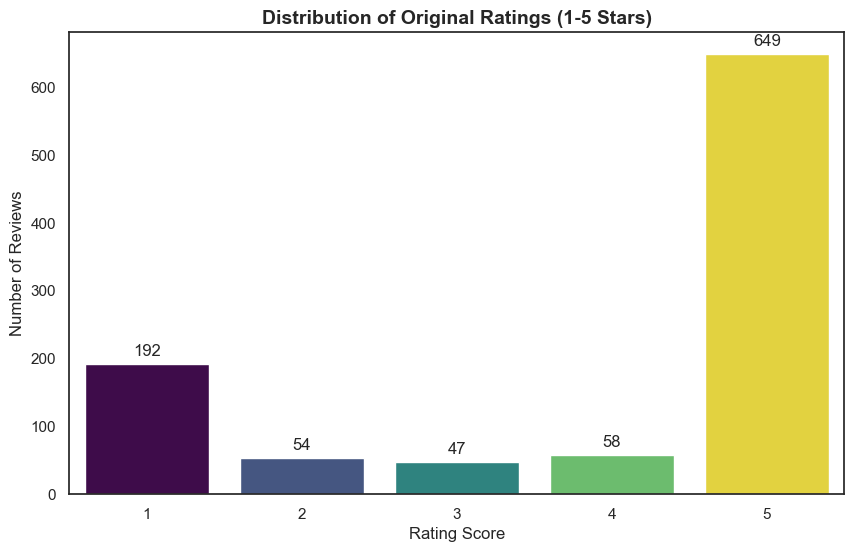

In [21]:
# Create a modern bar chart for ratings 1-5
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='score', data=df, palette='viridis', hue='score', legend=False)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Distribution of Original Ratings (1-5 Stars)', fontsize=14, fontweight='bold')
plt.xlabel('Rating Score')
plt.ylabel('Number of Reviews')

plt.savefig('../visualizations/distribution_original_ratings.png', dpi=300, bbox_inches='tight')
plt.show()

While the sentiment labels (Positive, Neutral, Negative) provide a broad overview, analyzing the raw star ratings reveals the intensity of user satisfaction and dissatisfaction.

#### **Visualization Insights:**
* **Dominant Customer Satisfaction**: The majority of users (**649 reviews**) gave a perfect **5-star rating**. This proves that DANA's core ecosystem is successfully meeting the needs of the larger user base.
* **The "Critical" Minority**: There is a significant spike at **1-star ratings (192 reviews)** compared to 2, 3, or 4 stars. This indicates a polarized user experience; when users encounter an issue, it is usually severe enough to warrant the lowest possible score.
* **Low "Neutral" Sentiment**: The relatively low number of 2 and 3-star ratings suggests that users rarely feel "average" about the app. They are either highly loyal or deeply frustrated by specific technical blockers.
* **Validation of Negative Word Cloud**: The 1-star spike directly correlates with the "Saldo" and "Login" issues found in the keyword analysis, representing the group that needs the most urgent technical support.

### **Top 10 Problem Keywords**

This visualization provides a quantitative look at the most frequent complaints found in negative feedback. By counting the appearance of specific stemmed keywords, we can pinpoint the exact features or processes that are failing user expectations.


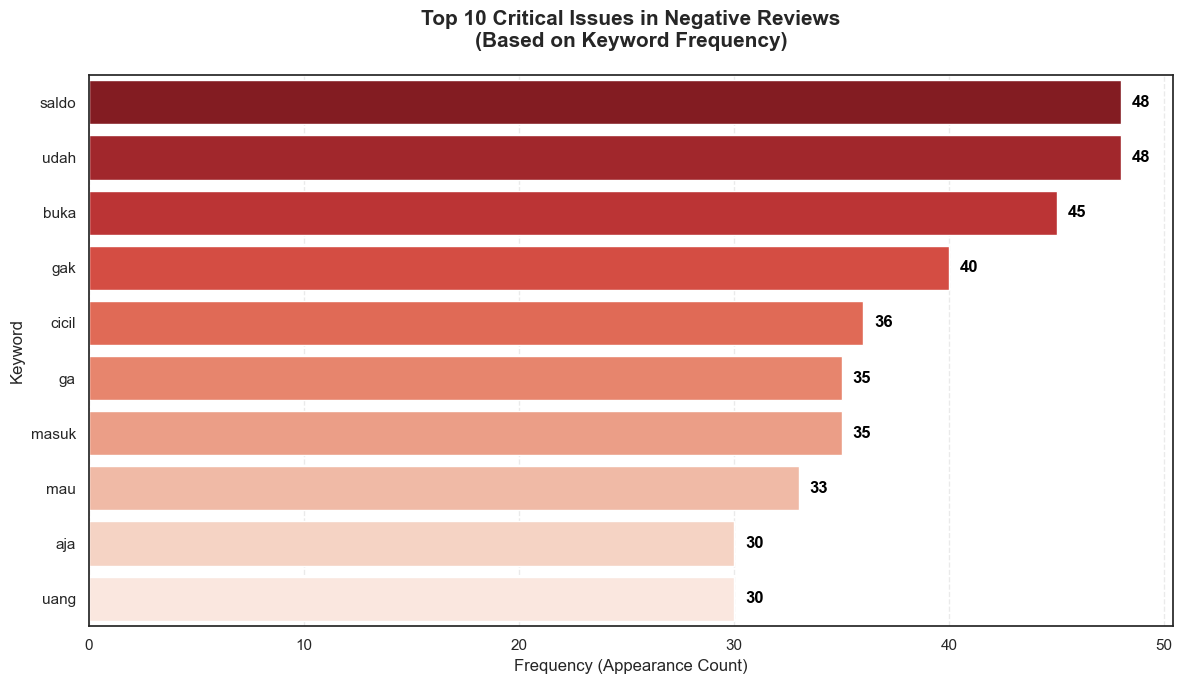

In [ ]:
from collections import Counter

# Extraction of negative keywords (Ensure text is string)
neg_words = ' '.join(df[df['sentiment'] == 'Negative']['content_clean'].astype(str)).split()
top_10_neg = Counter(neg_words).most_common(10)
df_top_neg = pd.DataFrame(top_10_neg, columns=['Word', 'Frequency'])

# Plotting with "Future-Proof" code
plt.figure(figsize=(12, 7))


ax = sns.barplot(
    x='Frequency', 
    y='Word', 
    data=df_top_neg, 
    palette='Reds_r', 
    hue='Word', 
    legend=False
)

# Add styling and labels
plt.title('Top 10 Critical Issues in Negative Reviews\n(Based on Keyword Frequency)', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Frequency (Appearance Count)', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Add value labels at the end of each bar
for i, v in enumerate(df_top_neg['Frequency']):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')

plt.savefig('../visualizations/top10_critical_issues_negative.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

This horizontal bar chart identifies the specific keywords that appear most frequently in negative reviews. This quantitative approach allows us to rank the technical and service failures based on their actual impact on the user base.

#### **Key Findings:**
* **Major Financial & Technical Alerts**: Keywords **"saldo"** and **"udah"** lead with **48 appearances each**. This indicates a high frequency of failed transaction logic where users have "already" (udah) done an action, but their "balance" (saldo) is not reflecting it.
* **App Stability Crisis**: The high frequency of **"buka"** (45 counts) and **"masuk"** (35 counts) confirms that many users are experiencing "hard-block" issues where they cannot even launch or login to the application.
* **Feature-Specific Friction**: **"Cicil"** appears **36 times**, reinforcing that the DANA Cicil feature is a significant source of frustration, likely due to limit issues or application errors identified in previous manual sampling.
* **Negative Sentiment Patterns**: Common Indonesian negation words like **"gak"** (40 counts) and **"ga"** (35 counts) highlight the gap between user expectations and the app's actual performance.

****

## **Final Executive Summary & Recommendations**

After analyzing 1,000 recent DANA application reviews, here is the strategic summary for the product and development teams:

> ### **1. Urgent: Fix Application Stability**
The highest priority is resolving the "Login/Open" loop. Users are reporting that the app often fails to open even with a good connection. A fintech app that cannot be accessed during a transaction creates immediate panic and loss of trust.

> ### **2. Critical: Balance & Transaction Synchronization**
The "Saldo" issues must be addressed. Development should focus on ensuring real-time UI updates for balances and providing clearer, faster transaction status notifications to reduce user anxiety when a transaction is "pending."

> ### **3. Strategic: DANA Cicil Transparency**
There is a clear negative sentiment regarding the "Cicil" feature. We recommend improving transparency regarding user eligibility and limits to manage expectations, as many 1-star reviews come from users who feel "misled" by the feature's availability.

> ### **Conclusion**
While DANA enjoys high overall satisfaction (over 600 5-star reviews), the **~25% negative sentiment** is concentrated in critical functional areas. By addressing these 10 core keywords, DANA can significantly reduce user churn and improve its Play Store rating.